In [1]:
import pandas as pd
beacons = pd.read_csv('beacons_dataset.csv',delimiter=';')
beacons.head()


,part_id,ts_date,ts_time,room
0,3089,20170915,06:45:22,Kitchen
1,3089,20170915,06:45:33,Bedroom
2,3089,20170915,06:45:39,Outdoor
3,3089,20170915,06:45:53,Bedroom
4,3089,20170915,06:46:09,Outdoor


In [2]:
beacons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58633 entries, 0 to 58632
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   part_id  58633 non-null  object
 1   ts_date  58633 non-null  int64 
 2   ts_time  58633 non-null  object
 3   room     58613 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.8+ MB


### 'part_id' is an object dtype, that means that the entries could be a few different data types, but most likely they are strings. We want to filter this feature, keep only the valid part_id values (4-digits integers) and drop the rest.


In [3]:
beacons['part_id'] = beacons['part_id'].apply(lambda x: x.strip())  #there might be valid part_id values that by accident have leading spaces or trailing spaces and we want to make sure that when we use isdigit() below they wont return a False value and then be dropped.
beacons['part_id'] = beacons['part_id'].apply(lambda x: int(x) if x.isdigit() and len(x)==4 else None ) 

In [4]:
beacons['part_id'].isna().sum()

11851

### There are 11851 instances that have invalid part_id values.

In [5]:
beacons.dropna(subset='part_id',inplace=True)
beacons['part_id'].isna().sum()

0

### They have been dropped.

In [6]:
beacons.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46782 entries, 0 to 58632
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   part_id  46782 non-null  float64
 1   ts_date  46782 non-null  int64  
 2   ts_time  46782 non-null  object 
 3   room     46776 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 1.8+ MB


### Cleaning the 'room' column.

In [7]:
rooms = beacons['room'].value_counts()
rooms[0:60]

room
Kitchen        11173
LivingRoom      6834
Bedroom         6360
Outdoor         5818
Bathroom        2901
DinerRoom       2668
Office          1608
Leavingroom     1498
Sittingroom     1017
Hall             905
SittingRoom      758
Livingroom       579
Sitingroom       448
Bedroom1         412
LeavingRoom      407
Entrance         252
Garage           248
Dinerroom        246
Bathroom1        240
Livingroom1      227
Livingroom2      210
Veranda          192
Bedroom2         159
Desk             152
Kitcen           141
SittingOver      117
Kitvhen          102
Box              100
Kichen            91
DinnerRoom        81
Office-2          79
Kitchen2          70
LuvingRoom        68
Chambre           62
SeatingRoom       61
Office1           53
Baghroom          43
Library           40
Storage           38
Living            31
Kitcheb           26
LivibgRoom        25
DiningRoom        23
ExitHall          20
Bathroom-1        16
livingroom        16
Washroom          13
Bedroom1

In [8]:
rooms[60:]

room
Two             5
Guard           3
Four            3
Leavivinroom    2
three           2
kitchen         2
Bathroim        2
Bsthroom        2
K               2
Kithen          2
TV              2
Sittinroom      1
DinningRoom     1
Bathroon        1
LivingRoom2     1
T               1
Liningroom      1
Garden          1
Luvingroom1     1
bedroom         1
LaundryRoom     1
Sittigroom      1
Name: count, dtype: int64

### It appears that there are 82 different categories of rooms, of course that is not true, the same room is described multiple times by different strings, we need to fix that. After a quick look, we conclude that rooms are represented with different synonym words, there might be an index in the name and also there are a lot of misspelled words. We create a number of lists where each list corresponds to a specific room in the house. The list for each room contains the different strings that this room is described by. Finally, we check each value in the 'room' column and we replace it with the correct label. For example, if it is a string found in the list 'kitchen' we replace the value with 'Kitchen'.

In [9]:
kitchen = ['Kitchen', 'Kitcen', 'Kitvhen', 'Kichen', 'Kitchen2', 'Kitcheb', 'Kiychen','kitchen','Kithen']

living_room = ['LivingRoom',
'Leavingroom',
'Sittingroom',
'SittingRoom',
'Livingroom',
'Sitingroom',
'LeavingRoom',
'Livingroom1',
'Livingroom2',
'LuvingRoom',
'SeatingRoom',
'Living',
'LivibgRoom',
'livingroom',
'Livingroon',
'Leavivinroom',
'Sittinroom',
'LivingRoom2',
'Liningroom',
'Luvingroom1',
'Sittigroom'
]

bedroom = ['Bedroom',
'Bedroom1',
'Bedroom2',
'Bedroom1st',
'Bedroom-1',
'Bedroom',
'Chambre',
'bedroom'
]

bathroom = ['Bathroom',
'Bathroom',
'Baghroom',
'Bathroom-1',
'Washroom',
'Bqthroom',
'Bathroom1',
'Bsthroom',
'Bathroim',
'Bathroon'
]


dinner_room = ['DinerRoom',
'Dinerroom',
'DiningRoom',
'DinningRoom'
]


office = ['Office',
'Office-2',
'Office-2',
'Office1st',
'Office2', 	
'Workroom',
'Desk',
'Office1'          
]

hall = ['Hall','ExitHall']

box = ['Box','Box-1']

laundry = ['LaundryRoom','Laundry']




In [10]:
beacons['room'] = beacons['room'].apply(lambda x: 'Kitchen' if x in kitchen else ('Livingroom' if x in living_room else 
                                                                                ('Bedroom' if x in bedroom else ('Bathroom' if x in bathroom else('DinnerRoom' if x in dinner_room else('Office' if x in office else('Hall' if x in hall else('Box' if x in box else('LaundryRoom' if x in laundry else x)))))))))
beacons['room'].value_counts()

room
Livingroom     12191
Kitchen        11615
Bedroom         7020
Outdoor         5818
Bathroom        3223
DinnerRoom      3019
Office          1915
Hall             925
Entrance         252
Garage           248
Veranda          192
SittingOver      117
Box              111
Library           40
Storage           38
LaundryRoom        9
One                9
2ndRoom            8
Pantry             7
Two                5
Four               3
Guard              3
three              2
K                  2
TV                 2
Garden             1
T                  1
Name: count, dtype: int64

### Some of the remaining categories such as 'K', 'T', 'Two', etc are probably false values but the dataset in its current form won't be the one to be merged with the clinical dataset and used for the final analysis, so it is not necessary to drop them. We are going to create a different dataset for that purpose using only the values 'Kitchen', 'Livingroom', 'Bedroom', 'Bathroom'.

In [11]:
beacons.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46782 entries, 0 to 58632
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   part_id  46782 non-null  float64
 1   ts_date  46782 non-null  int64  
 2   ts_time  46782 non-null  object 
 3   room     46776 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 1.8+ MB


### Before we continue, we notice a few missing values  in the 'room' column. Lets drop them.

In [12]:
beacons.dropna(subset='room',inplace=True)

In [13]:
beacons.isna().sum()

part_id    0
ts_date    0
ts_time    0
room       0
dtype: int64

### Converting the values in 'part_id' into integers.

In [14]:
beacons['part_id'] = beacons['part_id'].astype(int)

### The end goal is to create a new dataset, where there is only one entry per user. The entry will contain the percentage of the time the person has spent in rooms 'Kitchen', 'Livingroom', 'Bedroom', 'Bathroom'. As seen below, our current dataset is a time series, containing multiple entries per user.

In [15]:
beacons.sort_values(['part_id','ts_date','ts_time'], inplace=True)
beacons.head(10)

,part_id,ts_date,ts_time,room
14148,1001,20171021,14:45:30,Outdoor
14149,1001,20171101,14:07:11,Livingroom
14150,1001,20171107,15:37:59,Livingroom
14151,1001,20171117,15:52:46,Livingroom
14152,1001,20171117,15:52:58,Bathroom
14136,1001,20171209,09:29:56,Livingroom
14137,1001,20171209,09:29:59,Kitchen
14138,1001,20171209,09:30:35,Livingroom
14139,1001,20171209,09:30:39,Outdoor
14140,1001,20171209,09:30:46,Livingroom


### Before proceeding with the creation of the new dataset, the current must be thoroughly cleaned. We check to see if there are duplicate rows.

In [16]:
duplicateRows = beacons[beacons.duplicated(['ts_date', 'ts_time','part_id','room'],keep=False)]

print("Duplicate Rows based on date and time are:", duplicateRows, sep='\n')

Duplicate Rows based on date and time are:
       part_id   ts_date   ts_time        room
1912      2081  20171017  08:55:14     Bedroom
1913      2081  20171017  08:55:14     Bedroom
1914      2081  20171017  08:55:14     Bedroom
1915      2081  20171017  08:55:14     Bedroom
1916      2081  20171017  08:55:14     Bedroom
...        ...       ...       ...         ...
12648     3601  20171204  10:55:20     Kitchen
12649     3601  20171204  10:55:21  DinnerRoom
12650     3601  20171204  10:55:21     Kitchen
12651     3601  20171204  10:55:21  DinnerRoom
12652     3601  20171204  10:55:21     Kitchen

[2311 rows x 4 columns]


### There are 2311 duplicate rows, we will drop all of those except of their first occurence.

In [17]:
beacons.drop_duplicates(inplace=True)

In [18]:
duplicateRows = beacons[beacons.duplicated(['ts_date', 'ts_time','part_id'],keep=False)]

print("Duplicate Rows based on date and time are:",len(duplicateRows), duplicateRows, sep='\n')

Duplicate Rows based on date and time are:
54
       part_id   ts_date   ts_time        room
6426      2088  20171117  12:33:16     Outdoor
6427      2088  20171117  12:33:16     Kitchen
3949      2092  20171023  11:40:29     Bedroom
3950      2092  20171023  11:40:29  Livingroom
962       2094  20171009  12:23:08  Livingroom
964       2094  20171009  12:23:08     Kitchen
9941      2183  20171205  10:29:44    Bathroom
10030     2183  20171205  10:29:44     Outdoor
9103      3084  20171204  10:41:37     Kitchen
9104      3084  20171204  10:41:37  DinnerRoom
9105      3084  20171204  10:41:37     Bedroom
9108      3084  20171204  10:43:15  DinnerRoom
9109      3084  20171204  10:43:15     Kitchen
15143     3084  20180129  08:25:53     Outdoor
15144     3084  20180129  08:25:53  Livingroom
11017     3086  20171211  09:56:55     Kitchen
11018     3086  20171211  09:56:55  Livingroom
13680     3090  20171218  13:29:26  Livingroom
13681     3090  20171218  13:29:26     Kitchen
16922     3091

### There are 54 instances where a user has been spotted at the same date and time in two different rooms, which obviously is not possible, they cannot be in two different places at the same time. This is happening because they are in the range of two or more beacons at the same time. Because there is no way to know which is the correct room and because there only a low number of them (54 out of 44000+ instances) we will drop all.

In [19]:
beacons.drop_duplicates(subset=['ts_date', 'ts_time','part_id'],keep=False,inplace=True)

In [20]:
beacons.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44461 entries, 14148 to 50300
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   part_id  44461 non-null  int32 
 1   ts_date  44461 non-null  int64 
 2   ts_time  44461 non-null  object
 3   room     44461 non-null  object
dtypes: int32(1), int64(1), object(2)
memory usage: 1.5+ MB


### Every row has a specific 'room' value, the room which the person entered on the specific date and time. We assume that the person remained in the room till the next recording of the same day. Having this information we can compute how much time is spent in that room for every row. To do so we need to transform the values in the 'ts_date' column in the correct form so they can be turned into datetime objects.
### For example 20171204 --> '2017-12-04'

In [21]:
beacons['ts_date'] = beacons['ts_date'].astype(str)

def date_conversion(date):
    return date[:4]+'-'+date[4:6]+'-'+date[6:]
    
beacons['ts_date'] = beacons['ts_date'].apply(date_conversion)
beacons.head()


,part_id,ts_date,ts_time,room
14148,1001,2017-10-21,14:45:30,Outdoor
14149,1001,2017-11-01,14:07:11,Livingroom
14150,1001,2017-11-07,15:37:59,Livingroom
14151,1001,2017-11-17,15:52:46,Livingroom
14152,1001,2017-11-17,15:52:58,Bathroom


### The code below, takes the values of the columns 'ts_date' and 'ts_time' and creates a new column of datetime objects ('Datetime') containing both the date and the time for each entry. It then sorts the dataset by 'part_id' to differentiate between the different users and by 'Datetime' in order to have the correct order of the records. There are cases, where the next record of the same user has a big time difference from the previous one, this might be either because the beacons where not recording or because there are missing recordings from the dataset. Because the time spent in a room is computed with the assumption that that the person remained in the room till the next recording of the same day we need to take into consideration those cases and not compute a result for them (the values will be 0). This is why we create a mask, so the time difference is only computed in the following cases, the day has not changed, and if the day has changed it is only computed if the time difference is smaller than 12 hours. We also need to take into consideration the cases where the next recording is for a different user and the time difference is such that the previous conditions are True. In that case we do not want the time difference to be computed so our mask must be updated to deal with those cases as well. If all the conditions are met, the time difference between the current record and the next is computed, and the result is assigned to a new column 'TimeSpent' at the index of the current record.

In [22]:

beacons['Datetime'] = pd.to_datetime(beacons['ts_date'] + ' ' + beacons['ts_time'])

beacons.sort_values(['part_id','Datetime'], inplace = True)

# Calculate time spent per room
mask = (abs((beacons['Datetime'] - beacons['Datetime'].shift(1)).dt.total_seconds()) > 12 * 3600) & (beacons['ts_date'] != beacons['ts_date'].shift(1))   #shift is used to shift the values in a column
beacons['TimeSpent'] = beacons['Datetime'].diff().where((~mask) & (beacons['part_id']==beacons['part_id'].shift(1)), pd.Timedelta(seconds=0))   #where is used to conditionally replace values, if the conditions are not met the value is a 0 timedelta object  

beacons['TimeSpent'] = beacons['TimeSpent'].shift(-1) #.diff() computes the difference between the current value and the previous and puts the result in the current row, but we want the  resul to be put in the previous one so we use shift

# Fill NaN values in 'TimeSpent' with 0
beacons['TimeSpent'] = beacons['TimeSpent'].fillna(pd.Timedelta(seconds=0))

# Group by 'Room' and sum the time spent
result = beacons.groupby('room')['TimeSpent'].sum()

print('Total time spent in each room (all users)')
print(result)


Total time spent in each room (all users)
room
2ndRoom         0 days 00:05:43
Bathroom       18 days 23:09:52
Bedroom        64 days 15:51:56
Box             0 days 19:55:34
DinnerRoom     47 days 09:41:58
Entrance        0 days 12:59:20
Four            0 days 00:01:04
Garage          0 days 04:47:17
Garden          0 days 00:17:56
Guard           0 days 00:00:06
Hall            6 days 18:01:17
K               0 days 00:00:53
Kitchen       113 days 10:19:42
LaundryRoom     0 days 00:22:07
Library         0 days 14:21:52
Livingroom    122 days 10:09:58
Office         16 days 17:59:40
One             0 days 00:01:52
Outdoor        98 days 19:28:12
Pantry          0 days 00:01:06
SittingOver     0 days 00:45:34
Storage         1 days 09:29:20
T               0 days 00:00:00
TV              0 days 00:00:16
Two             0 days 00:06:59
Veranda         2 days 04:51:59
three           0 days 00:00:36
Name: TimeSpent, dtype: timedelta64[ns]


In [23]:
beacons.head()

,part_id,ts_date,ts_time,room,Datetime,TimeSpent
14148,1001,2017-10-21,14:45:30,Outdoor,2017-10-21 14:45:30,0 days 00:00:00
14149,1001,2017-11-01,14:07:11,Livingroom,2017-11-01 14:07:11,0 days 00:00:00
14150,1001,2017-11-07,15:37:59,Livingroom,2017-11-07 15:37:59,0 days 00:00:00
14151,1001,2017-11-17,15:52:46,Livingroom,2017-11-17 15:52:46,0 days 00:00:12
14152,1001,2017-11-17,15:52:58,Bathroom,2017-11-17 15:52:58,0 days 00:00:00


In [24]:
print('Time each user spent in each room ')
beacons.groupby(['part_id','room'])['TimeSpent'].sum()

Time each user spent in each room 


part_id  room      
1001     Bathroom     0 days 01:04:47
         Bedroom      0 days 05:24:19
         Hall         0 days 12:28:39
         Kitchen      0 days 04:20:41
         Livingroom   0 days 10:02:55
                            ...      
3611     DinnerRoom   1 days 03:57:21
         Guard        0 days 00:00:00
         Kitchen      2 days 08:08:26
         Livingroom   0 days 08:43:03
         Outdoor      1 days 15:30:12
Name: TimeSpent, Length: 1415, dtype: timedelta64[ns]

### We have found how many hours has each user spent in each room. To create the new dataset, we only need rooms 'Bedroom' , 'Bathroom', 'Livingroom', 'Kitchen' and we need the percentage of time each user spent in each room.

In [25]:
beacons_grouped = beacons.groupby(['part_id','room'])['TimeSpent'].sum().reset_index() #we use reset_index because it created a new df where the index column becomes a column of the dataframe, here in the groupby we have 2 columns that are indices , meaning we have a multyindex frame (part_id, room)

In [26]:
beacons_grouped.head()

,part_id,room,TimeSpent
0,1001,Bathroom,0 days 01:04:47
1,1001,Bedroom,0 days 05:24:19
2,1001,Hall,0 days 12:28:39
3,1001,Kitchen,0 days 04:20:41
4,1001,Livingroom,0 days 10:02:55


In [27]:
specific_values = ['Bedroom', 'Kitchen', 'Livingroom', 'Bathroom']  
# Use boolean indexing to keep rows belonging to the rooms in specific_values
beacons_grouped = beacons_grouped[beacons_grouped['room'].isin(specific_values)]

In [28]:
beacons_grouped['room'].value_counts()

room
Kitchen       276
Livingroom    273
Bedroom       223
Bathroom      177
Name: count, dtype: int64

### The cleaned dataset must contain one row per user - part_id. The pivot() function is ideal for this case.

In [29]:

# Pivot the DataFrame
beacons_pivoted = beacons_grouped.pivot(index='part_id', columns='room', values='TimeSpent')

# Reset the index to make 'part_id' a column
beacons_pivoted.reset_index(inplace=True)

beacons_pivoted.head()

room,part_id,Bathroom,Bedroom,Kitchen,Livingroom
0,1001,0 days 01:04:47,0 days 05:24:19,0 days 04:20:41,0 days 10:02:55
1,1003,0 days 01:48:36,NaT,0 days 01:21:38,0 days 03:27:39
2,1005,NaT,NaT,NaT,0 days 12:42:09
3,1006,0 days 08:28:02,0 days 02:13:26,0 days 17:52:49,0 days 02:24:57
4,1007,0 days 00:20:33,0 days 04:57:53,0 days 20:41:23,0 days 05:04:37


In [30]:
beacons_pivoted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype          
---  ------      --------------  -----          
 0   part_id     290 non-null    int32          
 1   Bathroom    177 non-null    timedelta64[ns]
 2   Bedroom     223 non-null    timedelta64[ns]
 3   Kitchen     276 non-null    timedelta64[ns]
 4   Livingroom  273 non-null    timedelta64[ns]
dtypes: int32(1), timedelta64[ns](4)
memory usage: 10.3 KB


### The last step is to find the percentage of time each user spent in each room. Before that, the empty values must be filled.

In [31]:
from datetime import timedelta
beacons_pivoted.fillna(timedelta(0),inplace=True)

In [32]:
beacons_pivoted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype          
---  ------      --------------  -----          
 0   part_id     290 non-null    int32          
 1   Bathroom    290 non-null    timedelta64[ns]
 2   Bedroom     290 non-null    timedelta64[ns]
 3   Kitchen     290 non-null    timedelta64[ns]
 4   Livingroom  290 non-null    timedelta64[ns]
dtypes: int32(1), timedelta64[ns](4)
memory usage: 10.3 KB


### Computing percentages

In [33]:
beacons_pivoted['Total_time'] = beacons_pivoted['Bathroom'] + beacons_pivoted['Bedroom'] + beacons_pivoted['Kitchen'] + beacons_pivoted['Livingroom']

In [34]:
beacons_pivoted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype          
---  ------      --------------  -----          
 0   part_id     290 non-null    int32          
 1   Bathroom    290 non-null    timedelta64[ns]
 2   Bedroom     290 non-null    timedelta64[ns]
 3   Kitchen     290 non-null    timedelta64[ns]
 4   Livingroom  290 non-null    timedelta64[ns]
 5   Total_time  290 non-null    timedelta64[ns]
dtypes: int32(1), timedelta64[ns](5)
memory usage: 12.6 KB


In [35]:
beacons_pivoted.head()

room,part_id,Bathroom,Bedroom,Kitchen,Livingroom,Total_time
0,1001,0 days 01:04:47,0 days 05:24:19,0 days 04:20:41,0 days 10:02:55,0 days 20:52:42
1,1003,0 days 01:48:36,0 days 00:00:00,0 days 01:21:38,0 days 03:27:39,0 days 06:37:53
2,1005,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 12:42:09,0 days 12:42:09
3,1006,0 days 08:28:02,0 days 02:13:26,0 days 17:52:49,0 days 02:24:57,1 days 06:59:14
4,1007,0 days 00:20:33,0 days 04:57:53,0 days 20:41:23,0 days 05:04:37,1 days 07:04:26


In [36]:
zeros = beacons_pivoted[beacons_pivoted['Total_time'] == pd.Timedelta('0 days 00:00:00')]
zeros

room,part_id,Bathroom,Bedroom,Kitchen,Livingroom,Total_time
20,1057,0 days,0 days,0 days,0 days,0 days
21,1061,0 days,0 days,0 days,0 days,0 days
59,1525,0 days,0 days,0 days,0 days,0 days
61,1529,0 days,0 days,0 days,0 days,0 days
62,1548,0 days,0 days,0 days,0 days,0 days
67,2013,0 days,0 days,0 days,0 days,0 days
162,2137,0 days,0 days,0 days,0 days,0 days
174,2515,0 days,0 days,0 days,0 days,0 days


### There are rows that have a value of 0 days in column 'Total_time'. If they are not dropped they will create a problem. In more detail, when dividing by Total_time to calculate percentages, the ZeroDivisionError will result in nan values, which then will be transformed into strings 'nan' when applying the function format_decimals() in the next cells and those values will be present in the final merged dataset making it impossible to use a clustering algorithm.

In [37]:
beacons_pivoted = beacons_pivoted[beacons_pivoted['Total_time'] != pd.Timedelta('0 days 00:00:00')]

In [38]:
beacons_pivoted['Bathroom'] = (beacons_pivoted['Bathroom'] / beacons_pivoted['Total_time'] ) * 100
beacons_pivoted['Bedroom'] = (beacons_pivoted['Bedroom'] / beacons_pivoted['Total_time'] ) * 100
beacons_pivoted['Kitchen'] = (beacons_pivoted['Kitchen'] / beacons_pivoted['Total_time'] ) * 100
beacons_pivoted['Livingroom'] = (beacons_pivoted['Livingroom'] / beacons_pivoted['Total_time'] ) * 100

In [39]:
beacons_pivoted.info()

<class 'pandas.core.frame.DataFrame'>
Index: 282 entries, 0 to 289
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype          
---  ------      --------------  -----          
 0   part_id     282 non-null    int32          
 1   Bathroom    282 non-null    float64        
 2   Bedroom     282 non-null    float64        
 3   Kitchen     282 non-null    float64        
 4   Livingroom  282 non-null    float64        
 5   Total_time  282 non-null    timedelta64[ns]
dtypes: float64(4), int32(1), timedelta64[ns](1)
memory usage: 14.3 KB


In [40]:
beacons_pivoted['Bathroom'] = beacons_pivoted['Bathroom'].astype(float)
beacons_pivoted['Bedroom'] = beacons_pivoted['Bedroom'].astype(float) 
beacons_pivoted['Kitchen'] = beacons_pivoted['Kitchen'].astype(float) 
beacons_pivoted['Livingroom'] = beacons_pivoted['Livingroom'].astype(float) 

In [41]:
#a function used to format float numbers to two decimal points
def format_decimals(x):
    return f'{x:.2f}'

In [42]:
beacons_pivoted['Bathroom'] = beacons_pivoted['Bathroom'].apply(format_decimals)
beacons_pivoted['Bedroom'] = beacons_pivoted['Bedroom'].apply(format_decimals)
beacons_pivoted['Kitchen'] = beacons_pivoted['Kitchen'].apply(format_decimals)
beacons_pivoted['Livingroom'] = beacons_pivoted['Livingroom'].apply(format_decimals)

In [43]:
beacons_pivoted.head()

room,part_id,Bathroom,Bedroom,Kitchen,Livingroom,Total_time
0,1001,5.17,25.89,20.81,48.13,0 days 20:52:42
1,1003,27.29,0.00,20.52,52.19,0 days 06:37:53
2,1005,0.00,0.00,0.00,100.00,0 days 12:42:09
3,1006,27.32,7.18,57.70,7.80,1 days 06:59:14
4,1007,1.10,15.98,66.58,16.34,1 days 07:04:26


In [44]:
beacons_cleaned = beacons_pivoted.drop(columns='Total_time')

In [45]:
beacons_cleaned.head()

room,part_id,Bathroom,Bedroom,Kitchen,Livingroom
0,1001,5.17,25.89,20.81,48.13
1,1003,27.29,0.00,20.52,52.19
2,1005,0.00,0.00,0.00,100.00
3,1006,27.32,7.18,57.70,7.80
4,1007,1.10,15.98,66.58,16.34


In [46]:
beacons_cleaned.to_csv('beacons_cleaned.csv', index=False)

### Complete the preproccessing of the datasets by merging the two cleaned datasets

In [47]:
clinical_cleaned = pd.read_csv('clinical_dataset_cleaned.csv')
merged = pd.merge(clinical_cleaned, beacons_cleaned, on='part_id',how='inner')  # how = 'inner' : Performs an inner join and includes only rows with matching key values (part_id) in both DataFrames

In [48]:
merged.head()

,part_id,fried,gender,age,hospitalization_one_year,hospitalization_three_years,ortho_hypotension,vision,audition,weight_loss,...,comorbidities_count,comorbidities_significant_count,medication_count,smoking_Current smoker,smoking_Never smoked,smoking_Past smoker (stopped at least 6 months),Bathroom,Bedroom,Kitchen,Livingroom
0,1001.0,0,0,75.0,0.0,0.0,0,1,2,0,...,5.0,0.0,5.0,0,1,0,5.17,25.89,20.81,48.13
1,1003.0,1,1,72.0,0.0,0.0,0,1,1,0,...,9.0,0.0,3.0,0,0,1,27.29,0.00,20.52,52.19
2,1005.0,1,0,83.0,0.0,4.0,1,1,0,0,...,12.0,0.0,4.0,1,0,0,0.00,0.00,0.00,100.00
3,1006.0,0,1,72.0,0.0,1.0,0,1,2,0,...,5.0,0.0,6.0,0,1,0,27.32,7.18,57.70,7.80
4,1007.0,0,0,70.0,0.0,0.0,0,1,2,0,...,4.0,0.0,2.0,1,0,0,1.10,15.98,66.58,16.34


In [49]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 61 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   part_id                                          270 non-null    float64
 1   fried                                            270 non-null    int64  
 2   gender                                           270 non-null    int64  
 3   age                                              270 non-null    float64
 4   hospitalization_one_year                         270 non-null    float64
 5   hospitalization_three_years                      270 non-null    float64
 6   ortho_hypotension                                270 non-null    int64  
 7   vision                                           270 non-null    int64  
 8   audition                                         270 non-null    int64  
 9   weight_loss                     

In [50]:
merged['Bathroom'] = merged['Bathroom'].astype(float)
merged['Bedroom'] = merged['Bedroom'].astype(float) 
merged['Kitchen'] = merged['Kitchen'].astype(float) 
merged['Livingroom'] = merged['Livingroom'].astype(float) 

In [51]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 61 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   part_id                                          270 non-null    float64
 1   fried                                            270 non-null    int64  
 2   gender                                           270 non-null    int64  
 3   age                                              270 non-null    float64
 4   hospitalization_one_year                         270 non-null    float64
 5   hospitalization_three_years                      270 non-null    float64
 6   ortho_hypotension                                270 non-null    int64  
 7   vision                                           270 non-null    int64  
 8   audition                                         270 non-null    int64  
 9   weight_loss                     

### Some of the features are of dtype float and not integers as they should. The code below fixes that.

In [52]:
data_type_mapping = {
    'part_id': int,  
    'age': int, 
    'hospitalization_one_year': int,  
    'hospitalization_three_years': int,  
    'exhaustion_score': int, 
    'balance_single': int, 
    'falls_one_year': int,  
    'fractures_three_years': int, 
    'waist': int, 
    'screening_score': int,  
    'cognitive_total_score': int, 
    'memory_complain': int, 
    'mmse_total_score': int,  
    'depression_total_score': int, 
    'leisure_out': int, 
    'social_visits': int,  
    'social_phone': int, 
    'social_calls': int, 
    'social_skype': int,  
    'social_text': int, 
    'house_suitable_participant': int,  
    'house_suitable_professional': int,  
    'stairs_number': int, 
    'katz_index': int,
    'iadl_grade': int,  
    'comorbidities_count': int, 
    'comorbidities_significant_count': int,
    'medication_count':int
    
    
}


merged = merged.astype(data_type_mapping)

In [53]:
merged.to_csv('merged_dataset.csv', index=False)

In [54]:
merged = pd.read_csv('merged_dataset.csv')

### Finally, a clustering algorithm will be used on the merged dataset. In more detail, the algorithm used is KMEANS. The code below, clusters the dataset using KMEANS for different values of 'k' which specifies the number of clusters. For each value of the parameter k, the shilouette score and the davies bouldin index is calculated. The values of both of these scores are plotted against the number of clusters. Furthermore, the shilouette diagrams are plotted as well.

C:\Users\Θανάσης\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Θανάσης\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Θανάσης\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Θανάσης\AppData\Local\Programs\Python\Python311\Lib\site-packages\skle

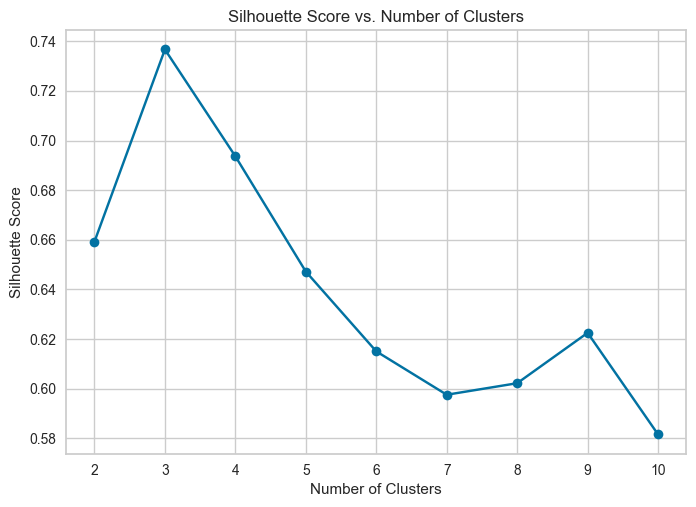

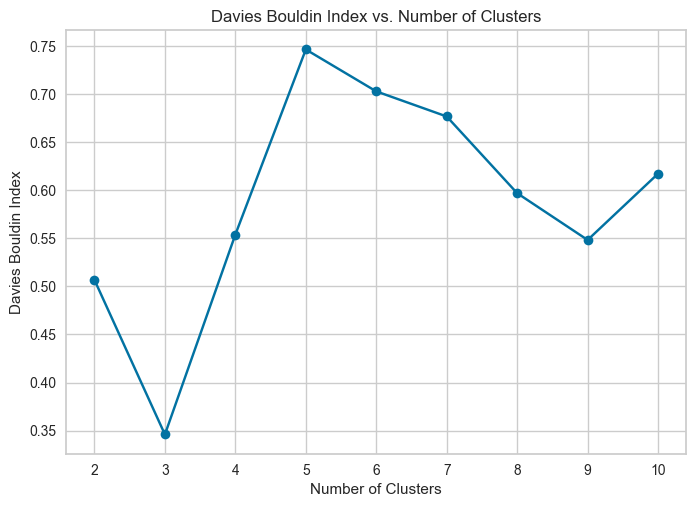

C:\Users\Θανάσης\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


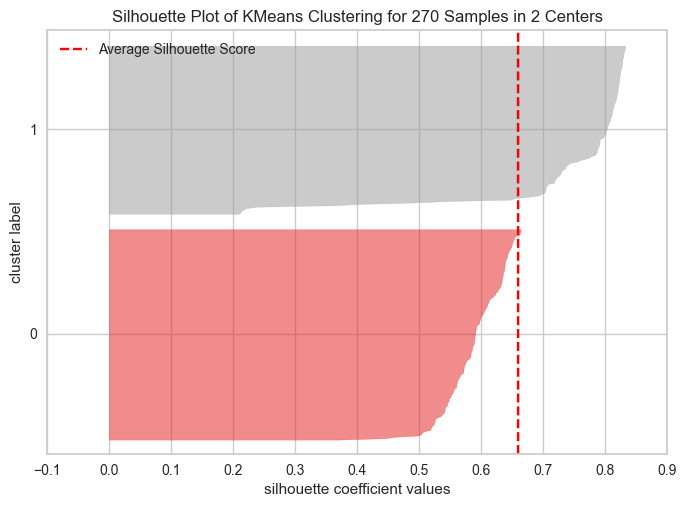

C:\Users\Θανάσης\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


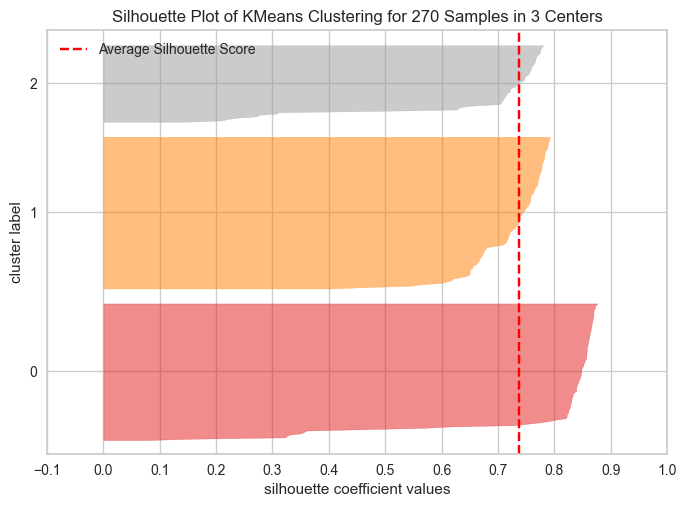

C:\Users\Θανάσης\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


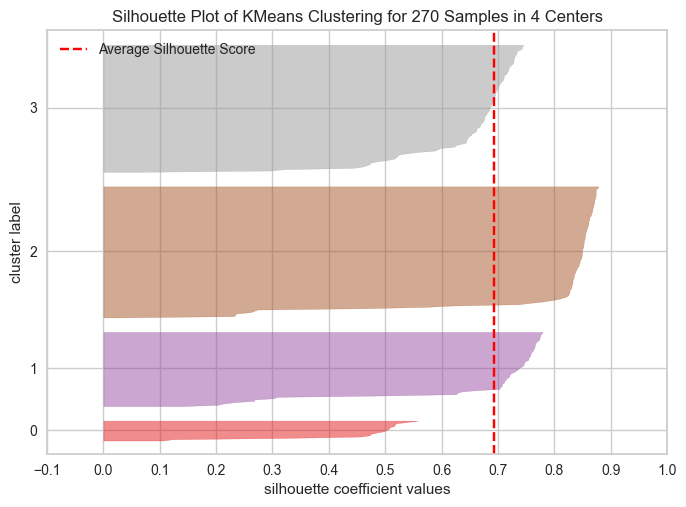

C:\Users\Θανάσης\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


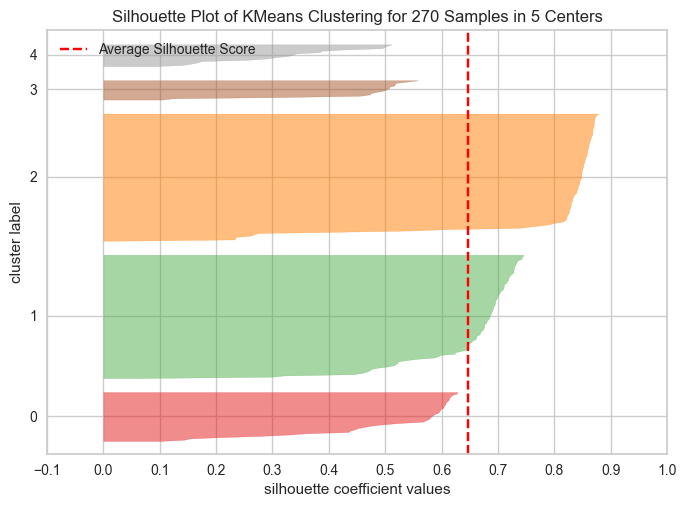

C:\Users\Θανάσης\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


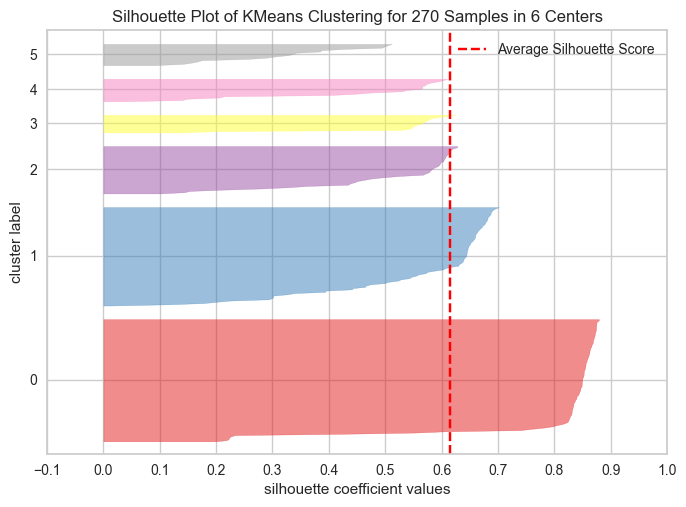

C:\Users\Θανάσης\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


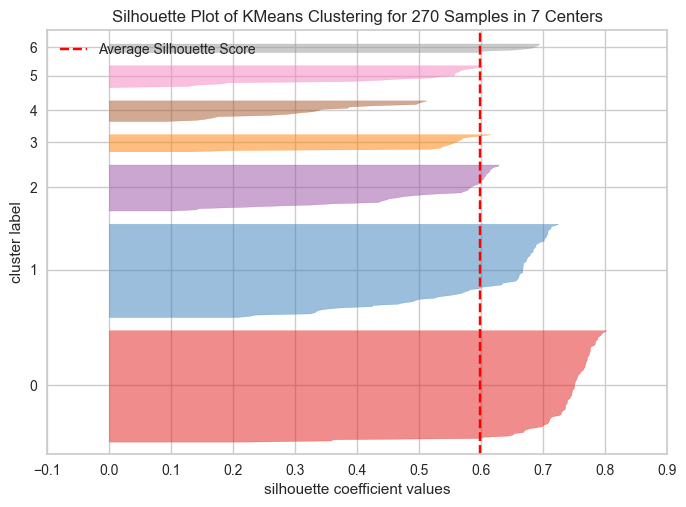

C:\Users\Θανάσης\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


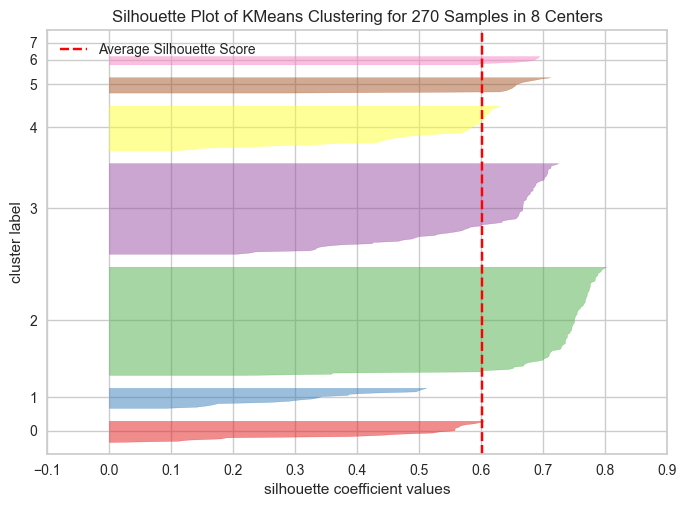

C:\Users\Θανάσης\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


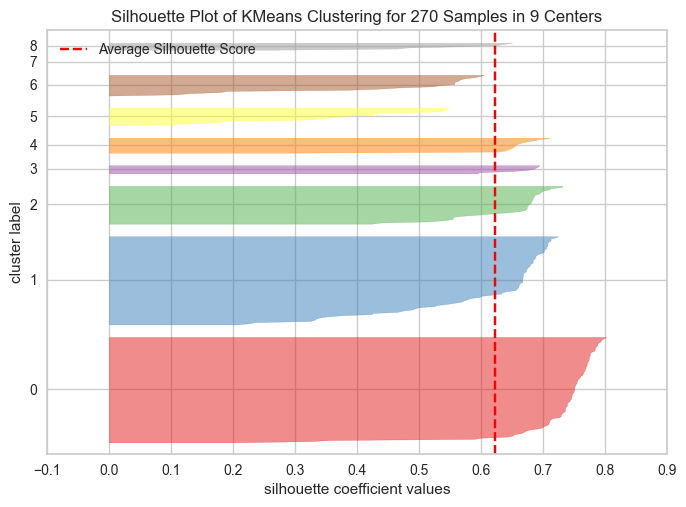

C:\Users\Θανάσης\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


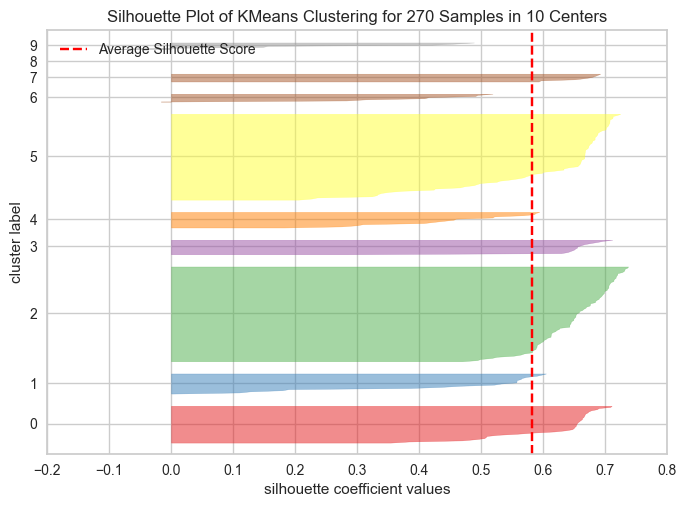

In [55]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import davies_bouldin_score


k_values = range(2, 11)   # the different number of clusters to be compared
scores = []       #a list containing the silhouette score for each different clustering ( different values for k)
dbi_scores = []     #a list containing the devies bouldin index for each different clustering ( different values for k )
visualizers = []

for k in k_values:
    kmeans = KMeans(n_clusters=k)
    labels = kmeans.fit_predict(merged)
    score = silhouette_score(merged, labels)
    dbi_score = davies_bouldin_score(merged, labels)
    scores.append(score)
    dbi_scores.append(dbi_score)
    # Create the shilouette diagram for better visualization
    visualizer = SilhouetteVisualizer(kmeans)
    visualizers.append(visualizer)
   

plt.plot(k_values, scores, marker='o')
plt.title("Silhouette Score vs. Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()

plt.plot(k_values, dbi_scores, marker='o')
plt.title("Davies Bouldin Index vs. Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Davies Bouldin Index")
plt.show()

for visualizer in visualizers:
    visualizer.fit(merged)
    visualizer.show()






### The bigger the shilouette score the better the clustering. Instead, a smaller davies bouldin index indicates a better formation of clusters. The above graphs indicate that the best choice for the number of clusters is k=3. At k=3 we have the max shilouette score and the min davies bouldin index.

### For the final step, lets use a dimensionality reduction algorithm on the dataset and then cluster again using k means and see if we get a better partitioning (bigger shilouette score - lower davies bouldin index). More specifically, PCA is used to reduce the dimensions.

In [56]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)                      #0.95 means that PCA() will automatically choose the number of principal components that preserve 95% of the variance
merged_pca = pca.fit_transform(merged)



C:\Users\Θανάσης\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Θανάσης\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Θανάσης\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Θανάσης\AppData\Local\Programs\Python\Python311\Lib\site-packages\skle

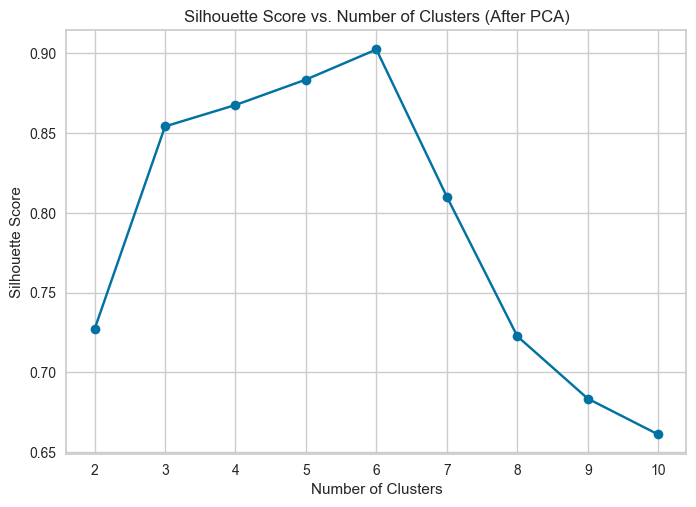

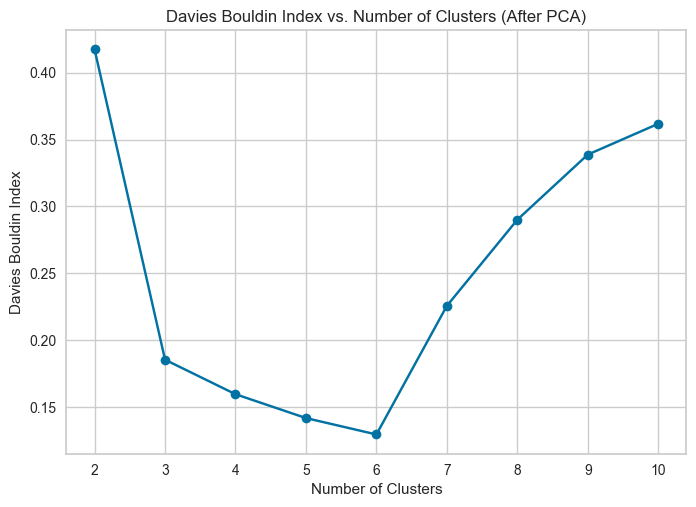

In [57]:

k_values = range(2, 11)   
scores = []     
dbi_scores = [] 
visualizers = []

for k in k_values:
    kmeans = KMeans(n_clusters=k)
    labels = kmeans.fit_predict(merged_pca)
    score = silhouette_score(merged_pca, labels)
    dbi_score = davies_bouldin_score(merged_pca, labels)
    scores.append(score)
    dbi_scores.append(dbi_score)
 

plt.plot(k_values, scores, marker='o')
plt.title("Silhouette Score vs. Number of Clusters (After PCA)")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()

plt.plot(k_values, dbi_scores, marker='o')
plt.title("Davies Bouldin Index vs. Number of Clusters (After PCA)")
plt.xlabel("Number of Clusters")
plt.ylabel("Davies Bouldin Index")
plt.show()


### Clustering without using a dimensionality reduction algorithm results in a maximum shilouette score equal to ~0.74 at k=3 whereas clustering after having applied PCA results in a maximum shilouette score equal to ~0.90 at k = 6. A bigger shilouette score indicates better clustering. In regards to the davies bouldin index, clustering without reducing the dimensions results in a minimum value of ~0.35 at k=3 and clustering after the implementation of PCA results in a minimum value of ~0.15 at k=6. In conclusion, the best course of action (according to both of the metrics used to evaluate the clustering) is to reduce the dimensions of the dataset using PCA and then use KMEANS to cluster it by choosing the number of the clusters to be 6.

### Why does PCA increase the performance of the clustering? High dimensional data can lead to the curse of dimensionality, and many clustering algorithms might find it difficult to identify patterns in the data, especially when these patterns - clusters exist in lower dimensionial sub spaces. By reducing the dimensions using PCA we retain most of the information (95% of the variance in this case) while handling the above problem to some extent.

### Exploratory analysis on the clustering results.

In [58]:
kmeans = KMeans(n_clusters=6)
merged['Cluster'] = kmeans.fit_predict(merged_pca)
fried_per_cluster=pd.DataFrame()

for cluster in range(6):
    cluster_data = merged[merged['Cluster'] == cluster]
    class_count = cluster_data['fried'].value_counts()
    fried_per_cluster[f'Cluster_{cluster}'] = class_count
    
fried_per_cluster

C:\Users\Θανάσης\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,Cluster_0,Cluster_1,Cluster_2,Cluster_3,Cluster_4,Cluster_5
fried,,,,,,
0,4,21,9.0,56,22,4
1,2,23,7.0,34,52,3
2,2,5,NaN,6,19,1


### The first observation is that most of the instances are located in clusters 1, 3, 4. Clusters 0,2,5 contain a small number of cases. Can it be that those three clusters contain outliers that have been clustered together? Secondly, we observe that most cases of Pre-Frail (1) and Frail (2) people  are found in cluster 4, meaning that we might want to pay more attention to new users that are being predicted to belong to cluster 4, because there is a significant probability that those might be in risk of exhibiting health issues.